In [1]:
import copy
import pathlib
from typing import Optional, Set
import os.path
import math

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats import proportion

In [3]:
from drmdp import dataproc

In [4]:
import warnings  # To suppress some warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [5]:
files = tf.io.gfile.glob(
    f"{pathlib.Path.home()}/fs/drmdp/workflows/controljob/agg/1763050698/1763058268/metrics/*.parquet"
)

In [6]:
df_metrics = dataproc.read_data(files, reader="pd")

In [7]:
df_metrics

,episode,exp_id,meta,returns,steps,metrics,method
0,60,1763050698-0116b72c-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[1549.9503623735377, 1558.7936667120832, 1502....","[330, 1098, 488, 308, 7, 7, 361, 7, 265, 508, ...","{'returns': {'mean': 785.2603900635597, 'std':...",IMR
1,60,1763050698-01376e3a-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[1362.1999149050525, 4.9933992951779835, 4.958...","[1016, 7, 7, 875, 10, 948, 1237, 350, 282, 11,...","{'returns': {'mean': 697.7584891426144, 'std':...",BLADE-TD
2,60,1763050698-025fc2cc-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[11812.216201251267, 10725.27666627742, 11021....","[10000, 2378, 3091, 2718, 10000, 10000, 5260, ...","{'returns': {'mean': 10882.047036944263, 'std'...",OP-A
3,60,1763050698-03997039-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[2493.1601525614333, 247.95767310065654, 613.1...","[4987, 17, 1611, 10000, 4716, 10000, 10000, 70...","{'returns': {'mean': 6865.64643421407, 'std': ...",BLADE-TD
4,60,1763050698-03c0d284-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[425.42135438737756, 2.8910620204350597, 13.22...","[647, 8, 10, 841, 394, 203, 656, 190, 7, 503, ...","{'returns': {'mean': 1044.0259757121707, 'std'...",BLADE-TD
...,...,...,...,...,...,...,...
246,110,1763050698-f82c3789-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[1201.5786284653914, 1284.4579611910822, 1014....","[481, 718, 531, 711, 530, 444, 405, 326, 884, ...","{'returns': {'mean': 981.9631833080044, 'std':...",BLADE-TD
247,110,1763050698-fd5aaaea-Finite-CC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[2361.1303144102485, 16977.873333187345, 13658...","[879, 10000, 10000, 10000, 1753, 760, 429, 100...","{'returns': {'mean': 10127.974338150085, 'std'...",IMR
248,110,1763050698-fd5e4b47-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[478.2993068247551, 1437.6164056802636, 1381.5...","[1085, 780, 415, 399, 187, 898, 511, 678, 439,...","{'returns': {'mean': 1079.209994423617, 'std':...",BLADE-TD[N-B]
249,110,1763050698-fe3af879-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[736.6548933136625, 255.85963865401706, 1278.5...","[941, 697, 658, 425, 896, 233, 276, 750, 629, ...","{'returns': {'mean': 942.4013851906973, 'std':...",BLADE-TD


In [8]:
df_metrics.iloc[0]["meta"]

{'context': {'dummy': 0},
 'exp_id': '1763050698-0116b72c-Finite-SC-ShuntDc-v0',
 'instance_id': 11,
 'run_config': {'episodes_per_run': 500,
  'log_episode_frequency': 10,
  'num_runs': 20,
  'output_dir': 'gs://mo-hendrix-ml-workflows-storage/drmdp/workflows/controljob/logs/1763050698/1763050698-0116b72c-Finite-SC-ShuntDc-v0/run_11/impute-missing/d99f392a',
  'use_seed': True},
 'env_spec': {'args': {'constraint_violation_reward': -10.0,
   'emit_state': True,
   'max_episode_steps': 10000,
   'penalty_gamma': 1.0,
   'reward_fn': 'pos-enf'},
  'feats_spec': {'args': None, 'name': 'scale'},
  'name': 'Finite-SC-ShuntDc-v0'},
 'epochs': 1,
 'problem_spec': {'delay_config': {'args': {'lam': 4.0,
    'max_delay': None,
    'min_delay': 2.0},
   'name': 'clipped-poisson'},
  'epsilon': 0.1,
  'gamma': 1.0,
  'learning_rate_config': {'args': {'initial_lr': 0.01}, 'name': 'constant'},
  'policy_type': 'markovian',
  'reward_mapper': {'args': {'attempt_estimation_episode': None,
    'check_

In [9]:
envs = dataproc.get_distinct_envs(df_metrics)

In [10]:
for env_name, args in envs.items():
    print(env_name, args)

Finite-SC-ShuntDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': True, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-TC-ShuntDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': True, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-CC-ShuntDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': False, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-TC-PermExDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': False, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-SC-PermExDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': False, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-CC-PermExDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': False, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}


In [11]:
df_metrics

,episode,exp_id,meta,returns,steps,metrics,method
0,60,1763050698-0116b72c-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[1549.9503623735377, 1558.7936667120832, 1502....","[330, 1098, 488, 308, 7, 7, 361, 7, 265, 508, ...","{'returns': {'mean': 785.2603900635597, 'std':...",IMR
1,60,1763050698-01376e3a-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[1362.1999149050525, 4.9933992951779835, 4.958...","[1016, 7, 7, 875, 10, 948, 1237, 350, 282, 11,...","{'returns': {'mean': 697.7584891426144, 'std':...",BLADE-TD
2,60,1763050698-025fc2cc-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[11812.216201251267, 10725.27666627742, 11021....","[10000, 2378, 3091, 2718, 10000, 10000, 5260, ...","{'returns': {'mean': 10882.047036944263, 'std'...",OP-A
3,60,1763050698-03997039-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[2493.1601525614333, 247.95767310065654, 613.1...","[4987, 17, 1611, 10000, 4716, 10000, 10000, 70...","{'returns': {'mean': 6865.64643421407, 'std': ...",BLADE-TD
4,60,1763050698-03c0d284-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[425.42135438737756, 2.8910620204350597, 13.22...","[647, 8, 10, 841, 394, 203, 656, 190, 7, 503, ...","{'returns': {'mean': 1044.0259757121707, 'std'...",BLADE-TD
...,...,...,...,...,...,...,...
246,110,1763050698-f82c3789-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[1201.5786284653914, 1284.4579611910822, 1014....","[481, 718, 531, 711, 530, 444, 405, 326, 884, ...","{'returns': {'mean': 981.9631833080044, 'std':...",BLADE-TD
247,110,1763050698-fd5aaaea-Finite-CC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[2361.1303144102485, 16977.873333187345, 13658...","[879, 10000, 10000, 10000, 1753, 760, 429, 100...","{'returns': {'mean': 10127.974338150085, 'std'...",IMR
248,110,1763050698-fd5e4b47-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[478.2993068247551, 1437.6164056802636, 1381.5...","[1085, 780, 415, 399, 187, 898, 511, 678, 439,...","{'returns': {'mean': 1079.209994423617, 'std':...",BLADE-TD[N-B]
249,110,1763050698-fe3af879-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[736.6548933136625, 255.85963865401706, 1278.5...","[941, 697, 658, 425, 896, 233, 276, 750, 629, ...","{'returns': {'mean': 942.4013851906973, 'std':...",BLADE-TD


In [12]:
sorted(df_metrics["meta"].apply(lambda meta: meta["env_spec"]["name"]).unique())

['Finite-CC-PermExDc-v0',
 'Finite-CC-ShuntDc-v0',
 'Finite-SC-PermExDc-v0',
 'Finite-SC-ShuntDc-v0',
 'Finite-TC-PermExDc-v0',
 'Finite-TC-ShuntDc-v0']

## Comparison: T-Test

In [13]:
PVALUE_THRESHOLD = 0.05

In [14]:
def parse_delay_config(df_input: pd.DataFrame):
    df = copy.deepcopy(df_input)

    def parse_mu(delay_config):
        if delay_config is None:
            return None
        args = delay_config["args"]
        try:
            return args["delay"]
        except KeyError:
            return args["lam"]
        except KeyError as exc:
            raise ValueError(f"Unknown delay config {args}") from exc

    df["delay_type"] = df["delay_config"].apply(lambda dc: dc["name"] if dc else None)
    df["delay_mu"] = df["delay_config"].apply(parse_mu)
    del df["delay_config"]
    return df

In [15]:
def max_episode_filter(df_input):
    env_spec = df_input["meta"].apply(lambda meta: meta["env_spec"])
    env_name = env_spec.apply(lambda spec: spec["name"])
    envs = env_name.unique()
    dfs = []
    for env in envs:
        df_slice = df_input[(env_name == env)]
        df_slice = df_slice[df_slice["episode"] == df_slice["episode"].max()]
        dfs.append(copy.deepcopy(df_slice))
    return pd.concat(dfs)

In [16]:
def filter_envs(df_input, envs: Set[str]):
    env_spec = df_input["meta"].apply(lambda meta: meta["env_spec"])
    mask = env_spec.apply(lambda spec: spec["name"] in envs)
    return copy.deepcopy(df_input[mask])

In [17]:
def extract_salient_meta_fields(df_data: pd.DataFrame):
    df_raw = copy.deepcopy(df_data)

    specs = {
        "env": df_raw["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_raw["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"]),
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_raw[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    for key in (
        "delay_config",
        "gamma",
    ):
        df_raw[key] = df_raw["meta"].apply(lambda meta: meta["problem_spec"][key])
    return parse_delay_config(df_raw)

In [18]:
def mannwhitney_less_than_test(
    candidate_xs, reference_ys, alpha: float = PVALUE_THRESHOLD
):
    """
    Use for
     - No assumption of Normality
     - Seeds are different for each algorithm
    """
    # stats.ttest_ind
    xs_stat, test_pvalue = stats.mannwhitneyu(
        candidate_xs, reference_ys, alternative="less"
    )
    if test_pvalue < alpha:
        outcome = "Reject H0 (Less than)"
    else:
        outcome = "Fail to reject H0 (Similar)"
    return outcome

In [19]:
def wilcoxon_less_than_test(candidate_xs, reference_ys, alpha=PVALUE_THRESHOLD):
    """
    Use for
     - No assumptions of Normality
     - Used the same seed for each algorithm
    """
    differences = candidate_xs - reference_ys

    non_zero_diffs = differences[differences != 0]
    if len(non_zero_diffs) < 10:
        print(f"Warning: Only {len(non_zero_diffs)} non-zero differences found.")
        print("The test may have low power. This is unusual for episodic returns.")

    # The 'zero_method' handles how to treat zero-differences.
    # 'pratt' is a good default (includes them in ranking),
    # 'wilcox' (default) discards them. Let's use 'pratt'.
    stat, test_pvalue = stats.wilcoxon(
        differences, alternative="less", zero_method="pratt"
    )
    if test_pvalue < alpha:
        outcome = "Reject H0 (Less than)"
    else:
        outcome = "Fail to reject H0 (Similar)"
    return outcome

In [20]:
def ztest(left_pos, left_neg, right_pos, right_neg, alpha=PVALUE_THRESHOLD):
    zstat, test_pvalue = proportion.proportions_ztest(
        count=left_pos,
        nobs=left_pos + left_neg,
        value=right_pos / (right_pos + right_neg),
    )
    if test_pvalue < alpha:
        outcome = "Reject H0 (Different)"
    else:
        outcome = "Fail to reject H0 (Similar)"
    return outcome

In [21]:
def sample_stat_test_method_comparison(df_data, episode: Optional[int] = None):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)

    df_result = extract_salient_meta_fields(df_result)

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    del df_result["meta"]
    del df_result["exp_id"]

    rows = []
    keys = ["env_name", "gamma", "delay_mu"]
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]

    baselines = {}
    for row in df_baseline.to_dict("records"):
        key = tuple(row[key] for key in keys[:-1])
        baselines[key] = row["returns"]

    rows = []
    for row in df_result.to_dict("records"):
        key = tuple([row[key] for key in keys[:-1]])
        full_reward_mean_return = baselines[key]

        test_result = mannwhitney_less_than_test(
            row["returns"], full_reward_mean_return
        )
        row["mannwhitney_less_than_test"] = test_result
        rows.append(row)
    df_test_result = pd.DataFrame(rows)

    # aggreate over algorithm args and reward periods
    agg_keys = ["method", "mannwhitney_less_than_test"]

    df_test_result_agg = (
        df_test_result[agg_keys].value_counts().reset_index().sort_values(agg_keys)
    )

    method_rows = (
        df_test_result_agg.pivot(
            index="method", columns="mannwhitney_less_than_test", values="count"
        )
        .reset_index()
        .to_dict("records")
    )
    df_test_result_agg = pd.DataFrame(method_rows)
    df_test_result_agg["Similarity Ratio"] = rations(df_test_result_agg)

    rows = []
    for left in method_rows:
        for right in method_rows:
            outcome = ztest(
                left_pos=left["Fail to reject H0 (Similar)"],
                left_neg=left["Reject H0 (Less than)"],
                right_pos=right["Fail to reject H0 (Similar)"],
                right_neg=right["Reject H0 (Less than)"],
            )
            row = {
                "left": left["method"],
                "right": right["method"],
                "outcome": outcome,
            }
            rows.append(row)
    df_conf = pd.DataFrame(rows)

    return {"sarsa": df_test_result}, {"sarsa": df_test_result_agg}, {"sarsa": df_conf}

In [22]:
def rations(df):
    df_raw = copy.deepcopy(df)
    df_raw = df_raw.fillna(0)
    return df_raw["Fail to reject H0 (Similar)"] / (
        df_raw["Fail to reject H0 (Similar)"] + df_raw["Reject H0 (Less than)"]
    )

**K=100**

In [23]:
df_test_outcome_k100, df_test_agg_stat_k100, df_test_comparison_k100 = (
    sample_stat_test_method_comparison(df_metrics, episode=100)
)

In [24]:
df_test_outcome_k100["sarsa"]

,episode,returns,steps,metrics,method,env_name,env_args,feats_name,feats_args,gamma,delay_type,delay_mu,mannwhitney_less_than_test
0,100,"[1289.916214597088, 1390.6982286736798, 1292.4...","[1027, 870, 655, 9, 249, 9, 507, 249, 461, 10,...","{'returns': {'mean': 651.1565878229396, 'std':...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Reject H0 (Less than)
1,100,"[1410.3035928385432, 1490.8921696133452, 69.98...","[836, 1235, 367, 637, 8, 695, 665, 452, 513, 2...","{'returns': {'mean': 860.2857455016574, 'std':...",BLADE-TD,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,6.0,Reject H0 (Less than)
2,100,"[10772.821048009857, 10705.019145435017, 10831...","[1085, 5543, 258, 10000, 2305, 856, 1831, 1000...","{'returns': {'mean': 10546.462884935729, 'std'...",OP-A,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},1.00,clipped-poisson,2.0,Reject H0 (Less than)
3,100,"[7050.164266031722, 15327.616058678437, 961.76...","[10000, 10000, 425, 10000, 10000, 10000, 10000...","{'returns': {'mean': 9435.642931985389, 'std':...",BLADE-TD,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,4.0,Fail to reject H0 (Similar)
4,100,"[675.8001537232401, 1323.1286986918215, 597.29...","[437, 504, 617, 1399, 701, 819, 157, 379, 372,...","{'returns': {'mean': 1101.2662546968277, 'std'...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,6.0,Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,100,"[1254.3748739157031, 1329.914480652893, 1302.5...","[922, 631, 493, 591, 220, 608, 344, 231, 717, ...","{'returns': {'mean': 987.907476408434, 'std': ...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,2.0,Reject H0 (Less than)
212,100,"[1989.5850563838105, 16818.724248071772, 17515...","[6388, 10000, 1886, 10000, 1075, 10000, 3301, ...","{'returns': {'mean': 9949.7321323251, 'std': 6...",IMR,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},1.00,clipped-poisson,6.0,Fail to reject H0 (Similar)
213,100,"[340.2794188602495, 1480.1142206221114, 811.94...","[408, 809, 972, 392, 125, 774, 289, 478, 621, ...","{'returns': {'mean': 1075.4556938614378, 'std'...",BLADE-TD[N-B],Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Fail to reject H0 (Similar)
214,100,"[710.4552449055014, 207.90577050234185, 1140.3...","[813, 503, 313, 591, 462, 558, 500, 1015, 890,...","{'returns': {'mean': 937.8705147474323, 'std':...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,8.0,Reject H0 (Less than)


In [25]:
df_test_agg_stat_k100["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than),Similarity Ratio
0,BLADE-TD,37.0,11.0,0.770833
1,BLADE-TD[N-B],35.0,13.0,0.729167
2,DMR,25.0,23.0,0.520833
3,IMR,22.0,26.0,0.458333
4,OP-A,NaN,24.0,0.000000


In [26]:
df_test_comparison_k100["sarsa"]

,left,right,outcome
0,BLADE-TD,BLADE-TD,Fail to reject H0 (Similar)
1,BLADE-TD,BLADE-TD[N-B],Fail to reject H0 (Similar)
2,BLADE-TD,DMR,Reject H0 (Different)
3,BLADE-TD,IMR,Reject H0 (Different)
4,BLADE-TD,OP-A,Fail to reject H0 (Similar)
5,BLADE-TD[N-B],BLADE-TD,Fail to reject H0 (Similar)
6,BLADE-TD[N-B],BLADE-TD[N-B],Fail to reject H0 (Similar)
7,BLADE-TD[N-B],DMR,Reject H0 (Different)
8,BLADE-TD[N-B],IMR,Reject H0 (Different)
9,BLADE-TD[N-B],OP-A,Fail to reject H0 (Similar)


In [27]:
df_test_outcome_k100["sarsa"]["method"].unique()

array(['IMR', 'BLADE-TD', 'OP-A', 'BLADE-TD[N-B]', 'DMR'], dtype=object)

**K=250**

In [28]:
df_test_outcome_k250, df_test_agg_stat_k250, df_test_comparison_k250 = (
    sample_stat_test_method_comparison(df_metrics, episode=300)
)

In [29]:
df_test_outcome_k250["sarsa"]

,episode,returns,steps,metrics,method,env_name,env_args,feats_name,feats_args,gamma,delay_type,delay_mu,mannwhitney_less_than_test
0,300,"[328.2595474438149, 1163.447750333858, 1354.40...","[440, 198, 449, 708, 1194, 843, 636, 917, 991,...","{'returns': {'mean': 791.888666345831, 'std': ...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Reject H0 (Less than)
1,300,"[1374.739569418705, 820.7379975920865, 2625.58...","[1135, 1672, 1550, 1055, 867, 623, 1158, 7671,...","{'returns': {'mean': 1791.0883444919757, 'std'...",BLADE-TD,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,6.0,Reject H0 (Less than)
2,300,"[10283.584031114982, 10324.542096396608, 9886....","[10000, 2479, 10000, 275, 168, 7846, 3948, 134...","{'returns': {'mean': 9903.182927667653, 'std':...",OP-A,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},1.00,clipped-poisson,2.0,Reject H0 (Less than)
3,300,"[12809.749837091049, 8981.983439085643, 16292....","[10000, 1599, 10000, 1009, 10000, 10000, 10000...","{'returns': {'mean': 13425.394104342227, 'std'...",BLADE-TD,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,4.0,Fail to reject H0 (Similar)
4,300,"[1931.2786434715013, 1291.3433753585755, 2281....","[491, 1496, 985, 10000, 733, 1703, 35, 4154, 1...","{'returns': {'mean': 1876.3045129236114, 'std'...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,6.0,Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,300,"[1220.8007591506157, 1091.988979498707, 1229.1...","[649, 635, 385, 571, 1106, 56, 428, 709, 917, ...","{'returns': {'mean': 1072.7350658935925, 'std'...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,2.0,Reject H0 (Less than)
212,300,"[15519.882389266864, 14928.534135787377, 14719...","[1350, 10000, 10000, 8243, 2245, 2390, 10000, ...","{'returns': {'mean': 11078.825710391739, 'std'...",IMR,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},1.00,clipped-poisson,6.0,Fail to reject H0 (Similar)
213,300,"[1361.184078095485, 1342.040160191716, 1073.84...","[362, 1125, 906, 76, 566, 526, 502, 852, 739, ...","{'returns': {'mean': 1193.7505658082998, 'std'...",BLADE-TD[N-B],Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Fail to reject H0 (Similar)
214,300,"[673.6475459680719, 1196.138129478497, 1172.01...","[246, 697, 984, 1227, 833, 396, 580, 1000, 879...","{'returns': {'mean': 1070.101493857836, 'std':...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,8.0,Reject H0 (Less than)


In [30]:
df_test_agg_stat_k250["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than),Similarity Ratio
0,BLADE-TD,37.0,11.0,0.770833
1,BLADE-TD[N-B],36.0,12.0,0.750000
2,DMR,22.0,26.0,0.458333
3,IMR,12.0,36.0,0.250000
4,OP-A,NaN,24.0,0.000000


In [31]:
df_test_comparison_k250["sarsa"]

,left,right,outcome
0,BLADE-TD,BLADE-TD,Fail to reject H0 (Similar)
1,BLADE-TD,BLADE-TD[N-B],Fail to reject H0 (Similar)
2,BLADE-TD,DMR,Reject H0 (Different)
3,BLADE-TD,IMR,Reject H0 (Different)
4,BLADE-TD,OP-A,Fail to reject H0 (Similar)
5,BLADE-TD[N-B],BLADE-TD,Fail to reject H0 (Similar)
6,BLADE-TD[N-B],BLADE-TD[N-B],Fail to reject H0 (Similar)
7,BLADE-TD[N-B],DMR,Reject H0 (Different)
8,BLADE-TD[N-B],IMR,Reject H0 (Different)
9,BLADE-TD[N-B],OP-A,Fail to reject H0 (Similar)


**K = Max(K)**

In [32]:
df_metrics

,episode,exp_id,meta,returns,steps,metrics,method
0,60,1763050698-0116b72c-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[1549.9503623735377, 1558.7936667120832, 1502....","[330, 1098, 488, 308, 7, 7, 361, 7, 265, 508, ...","{'returns': {'mean': 785.2603900635597, 'std':...",IMR
1,60,1763050698-01376e3a-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[1362.1999149050525, 4.9933992951779835, 4.958...","[1016, 7, 7, 875, 10, 948, 1237, 350, 282, 11,...","{'returns': {'mean': 697.7584891426144, 'std':...",BLADE-TD
2,60,1763050698-025fc2cc-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[11812.216201251267, 10725.27666627742, 11021....","[10000, 2378, 3091, 2718, 10000, 10000, 5260, ...","{'returns': {'mean': 10882.047036944263, 'std'...",OP-A
3,60,1763050698-03997039-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[2493.1601525614333, 247.95767310065654, 613.1...","[4987, 17, 1611, 10000, 4716, 10000, 10000, 70...","{'returns': {'mean': 6865.64643421407, 'std': ...",BLADE-TD
4,60,1763050698-03c0d284-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[425.42135438737756, 2.8910620204350597, 13.22...","[647, 8, 10, 841, 394, 203, 656, 190, 7, 503, ...","{'returns': {'mean': 1044.0259757121707, 'std'...",BLADE-TD
...,...,...,...,...,...,...,...
246,110,1763050698-f82c3789-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[1201.5786284653914, 1284.4579611910822, 1014....","[481, 718, 531, 711, 530, 444, 405, 326, 884, ...","{'returns': {'mean': 981.9631833080044, 'std':...",BLADE-TD
247,110,1763050698-fd5aaaea-Finite-CC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[2361.1303144102485, 16977.873333187345, 13658...","[879, 10000, 10000, 10000, 1753, 760, 429, 100...","{'returns': {'mean': 10127.974338150085, 'std'...",IMR
248,110,1763050698-fd5e4b47-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[478.2993068247551, 1437.6164056802636, 1381.5...","[1085, 780, 415, 399, 187, 898, 511, 678, 439,...","{'returns': {'mean': 1079.209994423617, 'std':...",BLADE-TD[N-B]
249,110,1763050698-fe3af879-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176305069...","[736.6548933136625, 255.85963865401706, 1278.5...","[941, 697, 658, 425, 896, 233, 276, 750, 629, ...","{'returns': {'mean': 942.4013851906973, 'std':...",BLADE-TD


In [33]:
df_test_outcome_kmax, df_test_agg_stat_kmax, df_test_comparison_kmax = (
    sample_stat_test_method_comparison(df_metrics)
)

In [34]:
df_test_outcome_kmax["sarsa"]

,episode,returns,steps,metrics,method,env_name,env_args,feats_name,feats_args,gamma,delay_type,delay_mu,mannwhitney_less_than_test
0,490,"[1387.8955468532708, 1275.4832389543121, 1217....","[493, 657, 692, 284, 297, 1051, 25, 833, 235, ...","{'returns': {'mean': 973.0941647543971, 'std':...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Reject H0 (Less than)
1,490,"[2590.6789559019953, 2411.5775766724214, 1307....","[2020, 1750, 123, 2932, 1286, 2434, 2335, 1011...","{'returns': {'mean': 2922.459535134556, 'std':...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,6.0,Fail to reject H0 (Similar)
2,490,"[1180.6710122952738, 1220.7634822838704, 2.673...","[17, 2593, 7, 7, 7, 8, 8, 10, 38, 379, 43, 8, ...","{'returns': {'mean': 384.4333355581331, 'std':...",DMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Reject H0 (Less than)
3,490,"[745.5738223607992, 1257.5697106345815, 1303.3...","[1034, 1592, 1007, 973, 394, 875, 1520, 1012, ...","{'returns': {'mean': 994.4180858860293, 'std':...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,6.0,Reject H0 (Less than)
4,490,"[1618.6376342796937, 3095.0886992821947, 1274....","[1112, 3545, 10000, 441, 873, 2970, 2701, 2991...","{'returns': {'mean': 2602.734254584291, 'std':...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,4.0,Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,490,"[13208.849235963544, 9817.426708053683, 6840.5...","[604, 10000, 1461, 10000, 1238, 10000, 10000, ...","{'returns': {'mean': 10674.227119152052, 'std'...",BLADE-TD,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},1.00,clipped-poisson,6.0,Fail to reject H0 (Similar)
212,490,"[177.42473174362203, 195.73747784710076, 267.3...","[372, 144, 46, 975, 28, 484, 254, 1154, 229, 5...","{'returns': {'mean': 377.0217820362646, 'std':...",OP-A,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},1.00,clipped-poisson,4.0,Reject H0 (Less than)
213,490,"[13498.782671923236, 5977.700195739151, 9424.9...","[3527, 10000, 51, 4877, 10000, 2426, 10000, 10...","{'returns': {'mean': 11342.487040095137, 'std'...",BLADE-TD[N-B],Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},1.00,clipped-poisson,4.0,Fail to reject H0 (Similar)
214,490,"[13752.94186767142, 15116.1160170974, 13455.79...","[1098, 804, 10000, 10000, 10000, 10000, 10000,...","{'returns': {'mean': 13524.301196161841, 'std'...",IMR,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)


In [35]:
df_test_agg_stat_kmax["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than),Similarity Ratio
0,BLADE-TD,41.0,7.0,0.854167
1,BLADE-TD[N-B],36.0,12.0,0.750000
2,DMR,20.0,28.0,0.416667
3,IMR,18.0,30.0,0.375000
4,OP-A,NaN,24.0,0.000000


In [87]:
def format_agg_stat(df_input: pd.DataFrame):
    df_raw = copy.deepcopy(df_input)
    for col in df_raw.columns:
        if "H0" in col:
            df_raw[col] = df_raw[col].fillna(0).astype(np.int64)
        if "Ratio" in col:
            df_raw[col] = (
                df_raw[col]
                .apply(lambda el: np.around(el * 100, decimals=2))
                .astype(str)
            )
    return df_raw

In [88]:
print(
    format_agg_stat(df_test_agg_stat_kmax["sarsa"]).to_latex(escape=False, index=False)
)

\begin{tabular}{lrrl}
\toprule
method & Fail to reject H0 (Similar) & Reject H0 (Less than) & Similarity Ratio \\
\midrule
BLADE-TD & 41 & 7 & 85.42 \\
BLADE-TD[N-B] & 36 & 12 & 75.0 \\
DMR & 20 & 28 & 41.67 \\
IMR & 18 & 30 & 37.5 \\
OP-A & 0 & 24 & 0.0 \\
\bottomrule
\end{tabular}



In [37]:
print(df_test_agg_stat_kmax["sarsa"].to_markdown(index=False))

| method        |   Fail to reject H0 (Similar) |   Reject H0 (Less than) |   Similarity Ratio |
|:--------------|------------------------------:|------------------------:|-------------------:|
| BLADE-TD      |                            41 |                       7 |           0.854167 |
| BLADE-TD[N-B] |                            36 |                      12 |           0.75     |
| DMR           |                            20 |                      28 |           0.416667 |
| IMR           |                            18 |                      30 |           0.375    |
| OP-A          |                           nan |                      24 |           0        |


In [38]:
df_test_comparison_kmax["sarsa"]

,left,right,outcome
0,BLADE-TD,BLADE-TD,Fail to reject H0 (Similar)
1,BLADE-TD,BLADE-TD[N-B],Reject H0 (Different)
2,BLADE-TD,DMR,Reject H0 (Different)
3,BLADE-TD,IMR,Reject H0 (Different)
4,BLADE-TD,OP-A,Fail to reject H0 (Similar)
5,BLADE-TD[N-B],BLADE-TD,Fail to reject H0 (Similar)
6,BLADE-TD[N-B],BLADE-TD[N-B],Fail to reject H0 (Similar)
7,BLADE-TD[N-B],DMR,Reject H0 (Different)
8,BLADE-TD[N-B],IMR,Reject H0 (Different)
9,BLADE-TD[N-B],OP-A,Fail to reject H0 (Similar)


## Env Split


### Electric Motor Control

In [39]:
df_test_outcome_gem, df_test_agg_stat_gem, df_test_comparison_gem = (
    sample_stat_test_method_comparison(
        filter_envs(
            df_metrics,
            envs=set(
                [
                    "Finite-CC-PermExDc-v0",
                    "Finite-CC-ShuntDc-v0",
                    "Finite-SC-PermExDc-v0",
                    "Finite-SC-ShuntDc-v0",
                    "Finite-TC-PermExDc-v0",
                    "Finite-TC-ShuntDc-v0",
                ]
            ),
        )
    )
)

In [40]:
df_test_outcome_gem["sarsa"]

,episode,returns,steps,metrics,method,env_name,env_args,feats_name,feats_args,gamma,delay_type,delay_mu,mannwhitney_less_than_test
0,490,"[1387.8955468532708, 1275.4832389543121, 1217....","[493, 657, 692, 284, 297, 1051, 25, 833, 235, ...","{'returns': {'mean': 973.0941647543971, 'std':...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Reject H0 (Less than)
1,490,"[2590.6789559019953, 2411.5775766724214, 1307....","[2020, 1750, 123, 2932, 1286, 2434, 2335, 1011...","{'returns': {'mean': 2922.459535134556, 'std':...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,6.0,Fail to reject H0 (Similar)
2,490,"[1180.6710122952738, 1220.7634822838704, 2.673...","[17, 2593, 7, 7, 7, 8, 8, 10, 38, 379, 43, 8, ...","{'returns': {'mean': 384.4333355581331, 'std':...",DMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Reject H0 (Less than)
3,490,"[745.5738223607992, 1257.5697106345815, 1303.3...","[1034, 1592, 1007, 973, 394, 875, 1520, 1012, ...","{'returns': {'mean': 994.4180858860293, 'std':...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,6.0,Reject H0 (Less than)
4,490,"[1618.6376342796937, 3095.0886992821947, 1274....","[1112, 3545, 10000, 441, 873, 2970, 2701, 2991...","{'returns': {'mean': 2602.734254584291, 'std':...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,4.0,Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,490,"[13208.849235963544, 9817.426708053683, 6840.5...","[604, 10000, 1461, 10000, 1238, 10000, 10000, ...","{'returns': {'mean': 10674.227119152052, 'std'...",BLADE-TD,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},1.00,clipped-poisson,6.0,Fail to reject H0 (Similar)
212,490,"[177.42473174362203, 195.73747784710076, 267.3...","[372, 144, 46, 975, 28, 484, 254, 1154, 229, 5...","{'returns': {'mean': 377.0217820362646, 'std':...",OP-A,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},1.00,clipped-poisson,4.0,Reject H0 (Less than)
213,490,"[13498.782671923236, 5977.700195739151, 9424.9...","[3527, 10000, 51, 4877, 10000, 2426, 10000, 10...","{'returns': {'mean': 11342.487040095137, 'std'...",BLADE-TD[N-B],Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},1.00,clipped-poisson,4.0,Fail to reject H0 (Similar)
214,490,"[13752.94186767142, 15116.1160170974, 13455.79...","[1098, 804, 10000, 10000, 10000, 10000, 10000,...","{'returns': {'mean': 13524.301196161841, 'std'...",IMR,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)


In [41]:
df_test_agg_stat_gem["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than),Similarity Ratio
0,BLADE-TD,41.0,7.0,0.854167
1,BLADE-TD[N-B],36.0,12.0,0.750000
2,DMR,20.0,28.0,0.416667
3,IMR,18.0,30.0,0.375000
4,OP-A,NaN,24.0,0.000000


In [42]:
print(df_test_agg_stat_gem["sarsa"].to_latex(escape=False, index=False))

\begin{tabular}{lrrr}
\toprule
method & Fail to reject H0 (Similar) & Reject H0 (Less than) & Similarity Ratio \\
\midrule
BLADE-TD & 41.000000 & 7.000000 & 0.854167 \\
BLADE-TD[N-B] & 36.000000 & 12.000000 & 0.750000 \\
DMR & 20.000000 & 28.000000 & 0.416667 \\
IMR & 18.000000 & 30.000000 & 0.375000 \\
OP-A & NaN & 24.000000 & 0.000000 \\
\bottomrule
\end{tabular}



In [43]:
df_test_comparison_gem["sarsa"]

,left,right,outcome
0,BLADE-TD,BLADE-TD,Fail to reject H0 (Similar)
1,BLADE-TD,BLADE-TD[N-B],Reject H0 (Different)
2,BLADE-TD,DMR,Reject H0 (Different)
3,BLADE-TD,IMR,Reject H0 (Different)
4,BLADE-TD,OP-A,Fail to reject H0 (Similar)
5,BLADE-TD[N-B],BLADE-TD,Fail to reject H0 (Similar)
6,BLADE-TD[N-B],BLADE-TD[N-B],Fail to reject H0 (Similar)
7,BLADE-TD[N-B],DMR,Reject H0 (Different)
8,BLADE-TD[N-B],IMR,Reject H0 (Different)
9,BLADE-TD[N-B],OP-A,Fail to reject H0 (Similar)


## Error Analysis

In [44]:
def error_cases(df_input, method):
    worse_result_mask = df_input["mannwhitney_less_than_test"].apply(
        lambda result: result == "Reject H0 (Less than)"
    )
    method_mask = df_input["method"] == method
    df_slice = copy.deepcopy(df_input[worse_result_mask & method_mask])
    df_result = (
        df_slice[["env_name", "gamma", "delay_mu", "method"]]
        .value_counts()
        .reset_index()
    )
    return df_result.sort_values(["env_name", "gamma", "delay_mu"])

In [45]:
error_cases(df_test_outcome_kmax["sarsa"], "DMR")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,2.0,DMR,1
1,Finite-CC-PermExDc-v0,0.99,6.0,DMR,1
26,Finite-CC-PermExDc-v0,0.99,8.0,DMR,1
25,Finite-CC-PermExDc-v0,1.00,2.0,DMR,1
24,Finite-CC-PermExDc-v0,1.00,6.0,DMR,1
23,Finite-CC-PermExDc-v0,1.00,8.0,DMR,1
22,Finite-SC-PermExDc-v0,0.99,2.0,DMR,1
21,Finite-SC-PermExDc-v0,0.99,4.0,DMR,1
20,Finite-SC-PermExDc-v0,0.99,6.0,DMR,1
19,Finite-SC-PermExDc-v0,1.00,2.0,DMR,1


In [46]:
error_cases(df_test_outcome_kmax["sarsa"], "IMR")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,4.0,IMR,1
1,Finite-CC-PermExDc-v0,0.99,6.0,IMR,1
28,Finite-CC-PermExDc-v0,0.99,8.0,IMR,1
27,Finite-CC-ShuntDc-v0,0.99,2.0,IMR,1
26,Finite-CC-ShuntDc-v0,0.99,4.0,IMR,1
25,Finite-CC-ShuntDc-v0,0.99,6.0,IMR,1
24,Finite-CC-ShuntDc-v0,0.99,8.0,IMR,1
23,Finite-SC-PermExDc-v0,0.99,2.0,IMR,1
22,Finite-SC-PermExDc-v0,0.99,4.0,IMR,1
21,Finite-SC-PermExDc-v0,0.99,6.0,IMR,1


In [47]:
error_cases(df_test_outcome_kmax["sarsa"], "OP-S")

,env_name,gamma,delay_mu,method,count


In [48]:
error_cases(df_test_outcome_kmax["sarsa"], "BLADE-TD[N-B]")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,2.0,BLADE-TD[N-B],1
1,Finite-SC-PermExDc-v0,0.99,6.0,BLADE-TD[N-B],1
2,Finite-SC-ShuntDc-v0,0.99,4.0,BLADE-TD[N-B],1
3,Finite-SC-ShuntDc-v0,0.99,6.0,BLADE-TD[N-B],1
4,Finite-SC-ShuntDc-v0,0.99,8.0,BLADE-TD[N-B],1
5,Finite-SC-ShuntDc-v0,1.00,2.0,BLADE-TD[N-B],1
6,Finite-SC-ShuntDc-v0,1.00,6.0,BLADE-TD[N-B],1
7,Finite-SC-ShuntDc-v0,1.00,8.0,BLADE-TD[N-B],1
8,Finite-TC-ShuntDc-v0,0.99,2.0,BLADE-TD[N-B],1
9,Finite-TC-ShuntDc-v0,0.99,4.0,BLADE-TD[N-B],1


In [49]:
error_cases(df_test_outcome_kmax["sarsa"], "BLADE-TD")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-ShuntDc-v0,1.00,2.0,BLADE-TD,1
1,Finite-SC-ShuntDc-v0,1.00,2.0,BLADE-TD,1
2,Finite-SC-ShuntDc-v0,1.00,8.0,BLADE-TD,1
3,Finite-TC-ShuntDc-v0,0.99,2.0,BLADE-TD,1
4,Finite-TC-ShuntDc-v0,0.99,6.0,BLADE-TD,1
5,Finite-TC-ShuntDc-v0,0.99,8.0,BLADE-TD,1
6,Finite-TC-ShuntDc-v0,1.00,2.0,BLADE-TD,1


## 95 CI

### 95 CI Tables

In [50]:
def flatten_results(df_data, gamma: float, episode: Optional[int] = None):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)

    for key in (
        "delay_config",
        "gamma",
    ):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"]),
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    df_result = df_result[(df_result["gamma"] == gamma)]

    # (env/level)  x (algorithm/algorithm_args) x reward period
    del df_result["meta"]
    del df_result["exp_id"]

    df_result = parse_delay_config(df_result)
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]
    baseline_dfs = []
    distinct_algo_configs = df_result[["delay_type", "delay_mu"]].drop_duplicates()

    df_result = df_result.sort_values(["method", "delay_type", "delay_mu"])
    df_result = df_result.explode("returns")
    df_result = df_result.rename(columns={"delay_mu": "delay"})
    return df_result

In [51]:
df_flat_gamma1 = flatten_results(df_metrics, gamma=1.0)

In [52]:
df_flat_gamma1

,episode,returns,steps,metrics,method,gamma,env_name,env_args,feats_name,feats_args,delay_type,delay
246,490,1263.11799,"[681, 1192, 425, 195, 1134, 263, 274, 1315, 10...","{'returns': {'mean': 1175.5522812575473, 'std'...",BLADE-TD,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,2.0
246,490,1311.962558,"[681, 1192, 425, 195, 1134, 263, 274, 1315, 10...","{'returns': {'mean': 1175.5522812575473, 'std'...",BLADE-TD,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,2.0
246,490,1281.751891,"[681, 1192, 425, 195, 1134, 263, 274, 1315, 10...","{'returns': {'mean': 1175.5522812575473, 'std'...",BLADE-TD,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,2.0
246,490,1202.021198,"[681, 1192, 425, 195, 1134, 263, 274, 1315, 10...","{'returns': {'mean': 1175.5522812575473, 'std'...",BLADE-TD,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,2.0
246,490,1417.654064,"[681, 1192, 425, 195, 1134, 263, 274, 1315, 10...","{'returns': {'mean': 1175.5522812575473, 'std'...",BLADE-TD,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,490,167.209978,"[372, 144, 46, 975, 28, 484, 254, 1154, 229, 5...","{'returns': {'mean': 377.0217820362646, 'std':...",OP-A,1.0,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},clipped-poisson,4.0
230,490,315.077466,"[372, 144, 46, 975, 28, 484, 254, 1154, 229, 5...","{'returns': {'mean': 377.0217820362646, 'std':...",OP-A,1.0,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},clipped-poisson,4.0
230,490,544.281435,"[372, 144, 46, 975, 28, 484, 254, 1154, 229, 5...","{'returns': {'mean': 377.0217820362646, 'std':...",OP-A,1.0,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},clipped-poisson,4.0
230,490,261.033382,"[372, 144, 46, 975, 28, 484, 254, 1154, 229, 5...","{'returns': {'mean': 377.0217820362646, 'std':...",OP-A,1.0,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},clipped-poisson,4.0


In [53]:
def calc_ci(xs, confidence: float, method: str = "auto"):
    if method not in ("auto", "t-distribution", "normal"):
        raise ValueError("Method must be one of: {auto, t-distribution, normal}")

    # calculate mean
    mean = np.mean(xs)
    # standard error
    std_err = stats.sem(xs)

    if (method == "auto" and len(xs) < 30) or method == "t-distribution":
        form = "t-distribution"
        lb, ub = stats.t.interval(
            confidence=confidence, df=len(xs) - 1, loc=mean, scale=std_err
        )
    else:
        form = "normal"
        lb, ub = stats.norm.interval(confidence=confidence, loc=mean, scale=std_err)

    ci = np.abs(ub - mean)
    return {"ub": ub, "lb": lb, "mean": mean, "ci": ci, "ci_method": form}

In [54]:
calc_ci(np.random.rand(100), confidence=0.95)

{'ub': 0.553388108529936,
 'lb': 0.44204727600849925,
 'mean': 0.49771769226921764,
 'ci': 0.05567041626071839,
 'ci_method': 'normal'}

In [55]:
# calculate for each env x method (across delays)

In [56]:
def algo_ci(df_results: pd.DataFrame, confidence: float) -> pd.DataFrame:
    """
    Calculate for each env x method (across delays)
    """
    envs = sorted(df_results["env_name"].unique())
    methods = sorted(df_results["method"].unique())

    rows = []
    for env in envs:
        for method in methods:
            df_slice = df_results[
                (df_results["env_name"] == env) & (df_results["method"] == method)
            ]

            ci_result = calc_ci(
                df_slice["returns"].values, confidence=confidence, method="auto"
            )
            ci_fmt = " ± ".join(
                [
                    str(np.around(ci_result["mean"], 2)),
                    str(np.around(ci_result["ci"], 2)),
                ]
            )
            row = {"env_name": env, "method": method, "ci_fmt": ci_fmt, **ci_result}
            rows.append(row)
    return pd.DataFrame(rows)

In [57]:
df_gamma1_ci95 = algo_ci(df_flat_gamma1, confidence=0.95)

In [58]:
df_gamma1_ci95.pivot(index="env_name", columns="method", values="ci_fmt")

method,BLADE-TD,BLADE-TD[N-B],DMR,IMR,OP-A
env_name,,,,,
Finite-CC-PermExDc-v0,10763.47 ± 474.2,10996.91 ± 481.24,8282.99 ± 1355.05,11627.74 ± 499.35,226.66 ± 60.44
Finite-CC-ShuntDc-v0,18024.6 ± 93.31,18030.56 ± 94.33,17606.95 ± 749.5,17857.39 ± 185.03,7966.6 ± 576.43
Finite-SC-PermExDc-v0,1252.29 ± 12.5,1258.62 ± 13.38,1147.82 ± 85.02,1205.4 ± 22.74,218.61 ± 28.14
Finite-SC-ShuntDc-v0,1196.08 ± 34.82,1191.87 ± 34.71,708.95 ± 152.63,944.68 ± 80.76,108.78 ± 8.76
Finite-TC-PermExDc-v0,11234.78 ± 331.4,11455.7 ± 287.07,7536.25 ± 1009.14,11297.35 ± 323.88,300.71 ± 85.08
Finite-TC-ShuntDc-v0,1264.74 ± 47.88,1300.88 ± 47.55,881.93 ± 157.78,1090.25 ± 87.46,128.3 ± 8.41


In [59]:
print(
    df_gamma1_ci95.pivot(index="env_name", columns="method", values="ci_fmt").to_latex()
)

\begin{tabular}{llllll}
\toprule
method & BLADE-TD & BLADE-TD[N-B] & DMR & IMR & OP-A \\
env_name &  &  &  &  &  \\
\midrule
Finite-CC-PermExDc-v0 & 10763.47 ± 474.2 & 10996.91 ± 481.24 & 8282.99 ± 1355.05 & 11627.74 ± 499.35 & 226.66 ± 60.44 \\
Finite-CC-ShuntDc-v0 & 18024.6 ± 93.31 & 18030.56 ± 94.33 & 17606.95 ± 749.5 & 17857.39 ± 185.03 & 7966.6 ± 576.43 \\
Finite-SC-PermExDc-v0 & 1252.29 ± 12.5 & 1258.62 ± 13.38 & 1147.82 ± 85.02 & 1205.4 ± 22.74 & 218.61 ± 28.14 \\
Finite-SC-ShuntDc-v0 & 1196.08 ± 34.82 & 1191.87 ± 34.71 & 708.95 ± 152.63 & 944.68 ± 80.76 & 108.78 ± 8.76 \\
Finite-TC-PermExDc-v0 & 11234.78 ± 331.4 & 11455.7 ± 287.07 & 7536.25 ± 1009.14 & 11297.35 ± 323.88 & 300.71 ± 85.08 \\
Finite-TC-ShuntDc-v0 & 1264.74 ± 47.88 & 1300.88 ± 47.55 & 881.93 ± 157.78 & 1090.25 ± 87.46 & 128.3 ± 8.41 \\
\bottomrule
\end{tabular}



Slicing for high delay problems

In [60]:
algo_ci(df_flat_gamma1[df_flat_gamma1["delay"] > 2], confidence=0.95).pivot(
    index="env_name", columns="method", values="ci_fmt"
)

method,BLADE-TD,BLADE-TD[N-B],DMR,IMR,OP-A
env_name,,,,,
Finite-CC-PermExDc-v0,10661.85 ± 570.8,11231.47 ± 577.64,8376.55 ± 1694.48,11673.6 ± 562.41,377.02 ± 81.69
Finite-CC-ShuntDc-v0,18059.79 ± 87.02,18048.15 ± 103.22,17278.16 ± 986.33,17820.34 ± 233.49,6153.75 ± 162.12
Finite-SC-PermExDc-v0,1253.56 ± 15.59,1249.77 ± 14.93,1175.96 ± 107.2,1201.45 ± 28.8,161.27 ± 11.83
Finite-SC-ShuntDc-v0,1202.92 ± 40.21,1183.0 ± 38.93,684.71 ± 187.38,933.62 ± 94.58,123.82 ± 5.87
Finite-TC-PermExDc-v0,11281.89 ± 392.31,11685.38 ± 315.22,7070.09 ± 1170.66,11269.88 ± 382.71,523.62 ± 104.75
Finite-TC-ShuntDc-v0,1270.63 ± 56.09,1306.99 ± 53.35,904.06 ± 194.22,1096.44 ± 105.21,137.73 ± 9.31


In [61]:
df_flat_gamma099 = flatten_results(df_metrics, gamma=0.99)

In [62]:
df_gamma099_ci95 = algo_ci(df_flat_gamma099, confidence=0.95)

In [63]:
df_gamma099_ci95.pivot(index="env_name", columns="method", values="ci_fmt")

method,BLADE-TD,BLADE-TD[N-B],DMR,IMR,OP-A
env_name,,,,,
Finite-CC-PermExDc-v0,14207.34 ± 456.3,14254.23 ± 462.95,8381.13 ± 1428.59,12090.84 ± 490.31,242.28 ± 73.41
Finite-CC-ShuntDc-v0,18190.57 ± 79.51,18101.56 ± 126.3,18262.4 ± 482.65,16905.45 ± 116.51,7840.8 ± 578.93
Finite-SC-PermExDc-v0,1206.12 ± 13.04,1187.73 ± 16.25,948.81 ± 83.28,966.85 ± 26.81,211.72 ± 31.85
Finite-SC-ShuntDc-v0,2654.84 ± 143.41,2497.26 ± 148.83,758.5 ± 150.33,2444.73 ± 399.39,80.37 ± 8.48
Finite-TC-PermExDc-v0,14584.6 ± 283.43,14856.45 ± 263.88,9073.08 ± 1012.67,12467.1 ± 288.0,284.3 ± 80.3
Finite-TC-ShuntDc-v0,4196.1 ± 348.48,4293.39 ± 327.15,840.82 ± 165.27,3227.73 ± 502.94,91.32 ± 8.25


In [64]:
print(
    df_gamma099_ci95.pivot(
        index="env_name", columns="method", values="ci_fmt"
    ).to_latex()
)

\begin{tabular}{llllll}
\toprule
method & BLADE-TD & BLADE-TD[N-B] & DMR & IMR & OP-A \\
env_name &  &  &  &  &  \\
\midrule
Finite-CC-PermExDc-v0 & 14207.34 ± 456.3 & 14254.23 ± 462.95 & 8381.13 ± 1428.59 & 12090.84 ± 490.31 & 242.28 ± 73.41 \\
Finite-CC-ShuntDc-v0 & 18190.57 ± 79.51 & 18101.56 ± 126.3 & 18262.4 ± 482.65 & 16905.45 ± 116.51 & 7840.8 ± 578.93 \\
Finite-SC-PermExDc-v0 & 1206.12 ± 13.04 & 1187.73 ± 16.25 & 948.81 ± 83.28 & 966.85 ± 26.81 & 211.72 ± 31.85 \\
Finite-SC-ShuntDc-v0 & 2654.84 ± 143.41 & 2497.26 ± 148.83 & 758.5 ± 150.33 & 2444.73 ± 399.39 & 80.37 ± 8.48 \\
Finite-TC-PermExDc-v0 & 14584.6 ± 283.43 & 14856.45 ± 263.88 & 9073.08 ± 1012.67 & 12467.1 ± 288.0 & 284.3 ± 80.3 \\
Finite-TC-ShuntDc-v0 & 4196.1 ± 348.48 & 4293.39 ± 327.15 & 840.82 ± 165.27 & 3227.73 ± 502.94 & 91.32 ± 8.25 \\
\bottomrule
\end{tabular}



### 95 CI Plots

In [65]:
METHODS_PALETTES = {
    key: palette for key, palette in zip(dataproc.ORDERED_METHODS, sns.color_palette())
}

In [66]:
def export_figure(
    figure, name: str, format: str = "pdf", dpi=300, transparent: bool = True
):
    # to be able to save, we must plot
    base_dir = os.path.dirname(name)
    if not os.path.exists(base_dir):
        tf.io.gfile.makedirs(base_dir)
    figure.savefig(f"{name}.{format}", dpi=dpi, format=format, transparent=transparent)

In [67]:
def plot_return_ci(
    df_data,
    gamma: float,
    suffix: str,
    output_dir: str = "figures/95ci",
    episode: Optional[int] = None,
):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)

    for key in (
        "delay_config",
        "gamma",
    ):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"]),
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    df_result = df_result[(df_result["gamma"] == gamma)]

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    del df_result["meta"]
    del df_result["exp_id"]

    df_result = parse_delay_config(df_result)
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]
    baseline_dfs = []
    distinct_algo_configs = df_result[["delay_type", "delay_mu"]].drop_duplicates()

    # Replicate baseline results for each config
    # to make plotting easier.
    for row in distinct_algo_configs.to_dict("records"):
        print(row)
        df_baseline_rp = copy.deepcopy(df_baseline)
        # reward period is one
        df_baseline_rp["delay_type"] = row["delay_type"]
        df_baseline_rp["delay_mu"] = row["delay_mu"]
        baseline_dfs.append(df_baseline_rp)
    df_result = pd.concat(baseline_dfs + [df_result], axis=0)
    df_result = df_result.sort_values(["method", "delay_type", "delay_mu"])
    df_result = df_result.explode("returns")
    df_result = df_result.rename(columns={"delay_mu": "delay"})

    envs = sorted(df_result["env_name"].unique())
    nrows = 3
    ncols = math.ceil(len(envs) / nrows)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 4 * nrows))
    for ax, env in zip(axes.flatten(), envs):
        df_plot = df_result[df_result["env_name"] == env]
        sns.pointplot(
            data=df_plot,
            x="delay",
            y="returns",
            hue="method",
            dodge=True,
            errorbar=("ci", 95),
            palette=METHODS_PALETTES,
            ax=ax,
        )
        title = f"{env}, $\gamma={gamma}$"
        ax.set_title(title)
    fig.tight_layout()
    name_prefix = "_".join([str(token) for token in ["95ci", gamma]])
    export_figure(fig, os.path.join(output_dir, f"{name_prefix}_{suffix}"))

{'delay_type': 'clipped-poisson', 'delay_mu': 4.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 6.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 8.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 2.0}


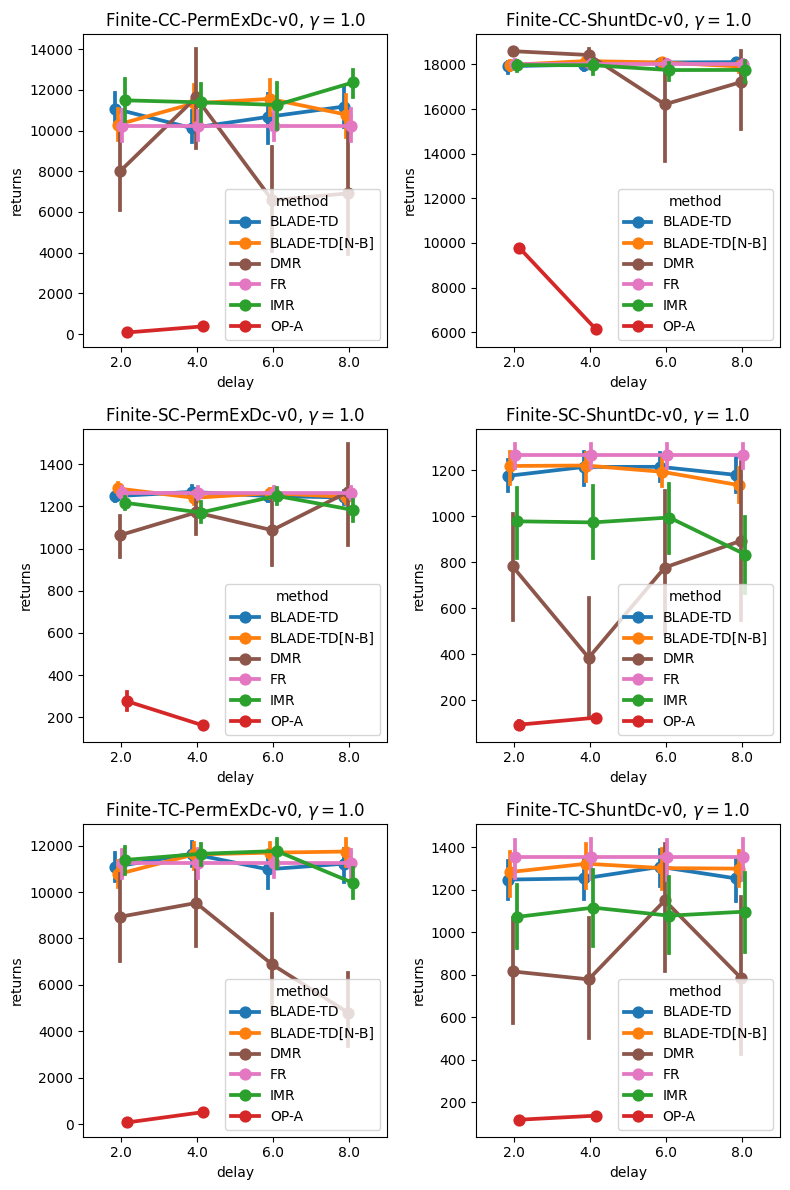

In [68]:
plot_return_ci(df_metrics, gamma=1.0, suffix="sarsa")

{'delay_type': 'clipped-poisson', 'delay_mu': 6.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 4.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 2.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 8.0}


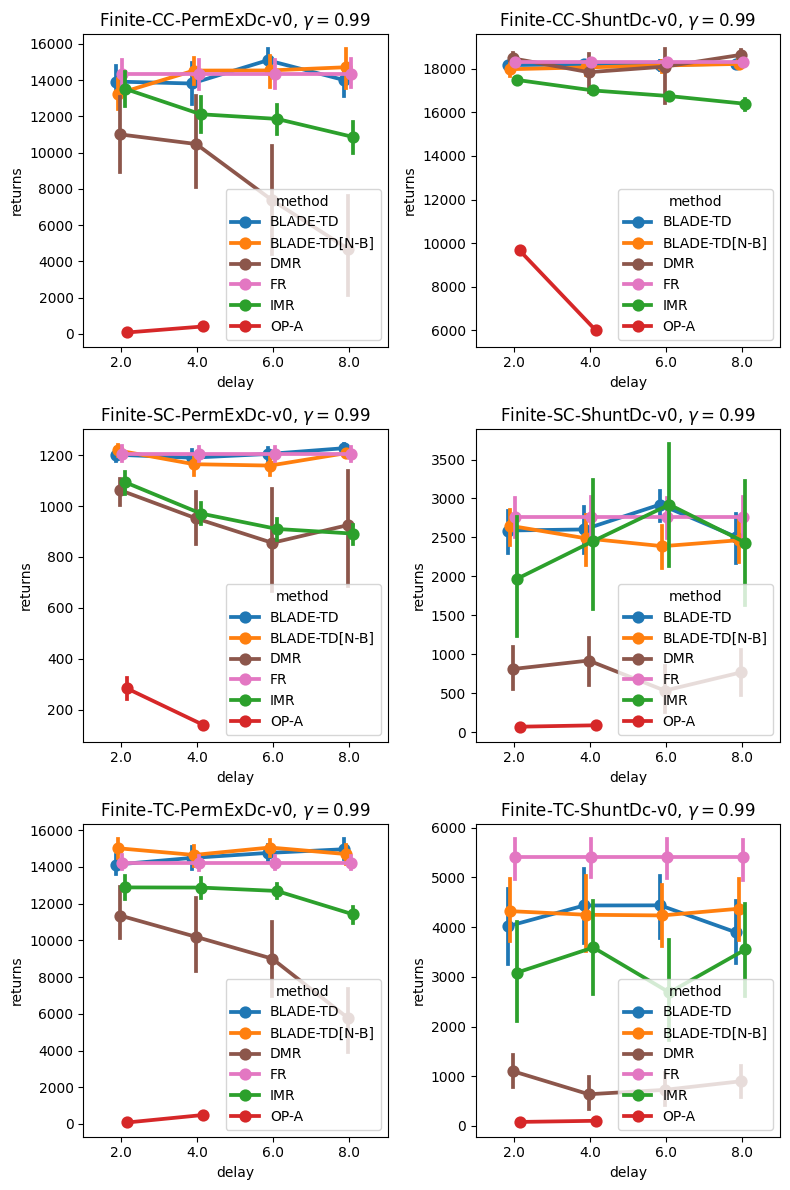

In [69]:
plot_return_ci(df_metrics, gamma=0.99, suffix="sarsa")

## Sample distributions

In [70]:
def plot_sample_dist(df_data, num_samples: int = 2):
    df_slice = max_episode_filter(df_data)
    df_slice = df_slice[["method", "meta", "returns"]]
    df_raw = copy.deepcopy(df_slice)
    methods = sorted(df_raw["method"].unique())

    fig, axes = plt.subplots(
        nrows=len(methods),
        ncols=num_samples,
        figsize=(4 * num_samples, 4 * len(methods)),
    )
    for row, method in enumerate(methods):
        df_algomethod = df_raw[(df_raw["method"] == method)]
        df_samples = df_algomethod.sample(n=num_samples)
        for idx in range(num_samples):
            ax = axes[row, idx]
            sample = df_samples.iloc[idx]
            miu = np.round(np.mean(sample["returns"]), decimals=2)
            sns.histplot(sample["returns"], ax=ax)
            title_template = " ".join(
                [
                    method,
                    "$\mu$ =",
                    str(miu),
                ]
            )
            ax.set_title(title_template)

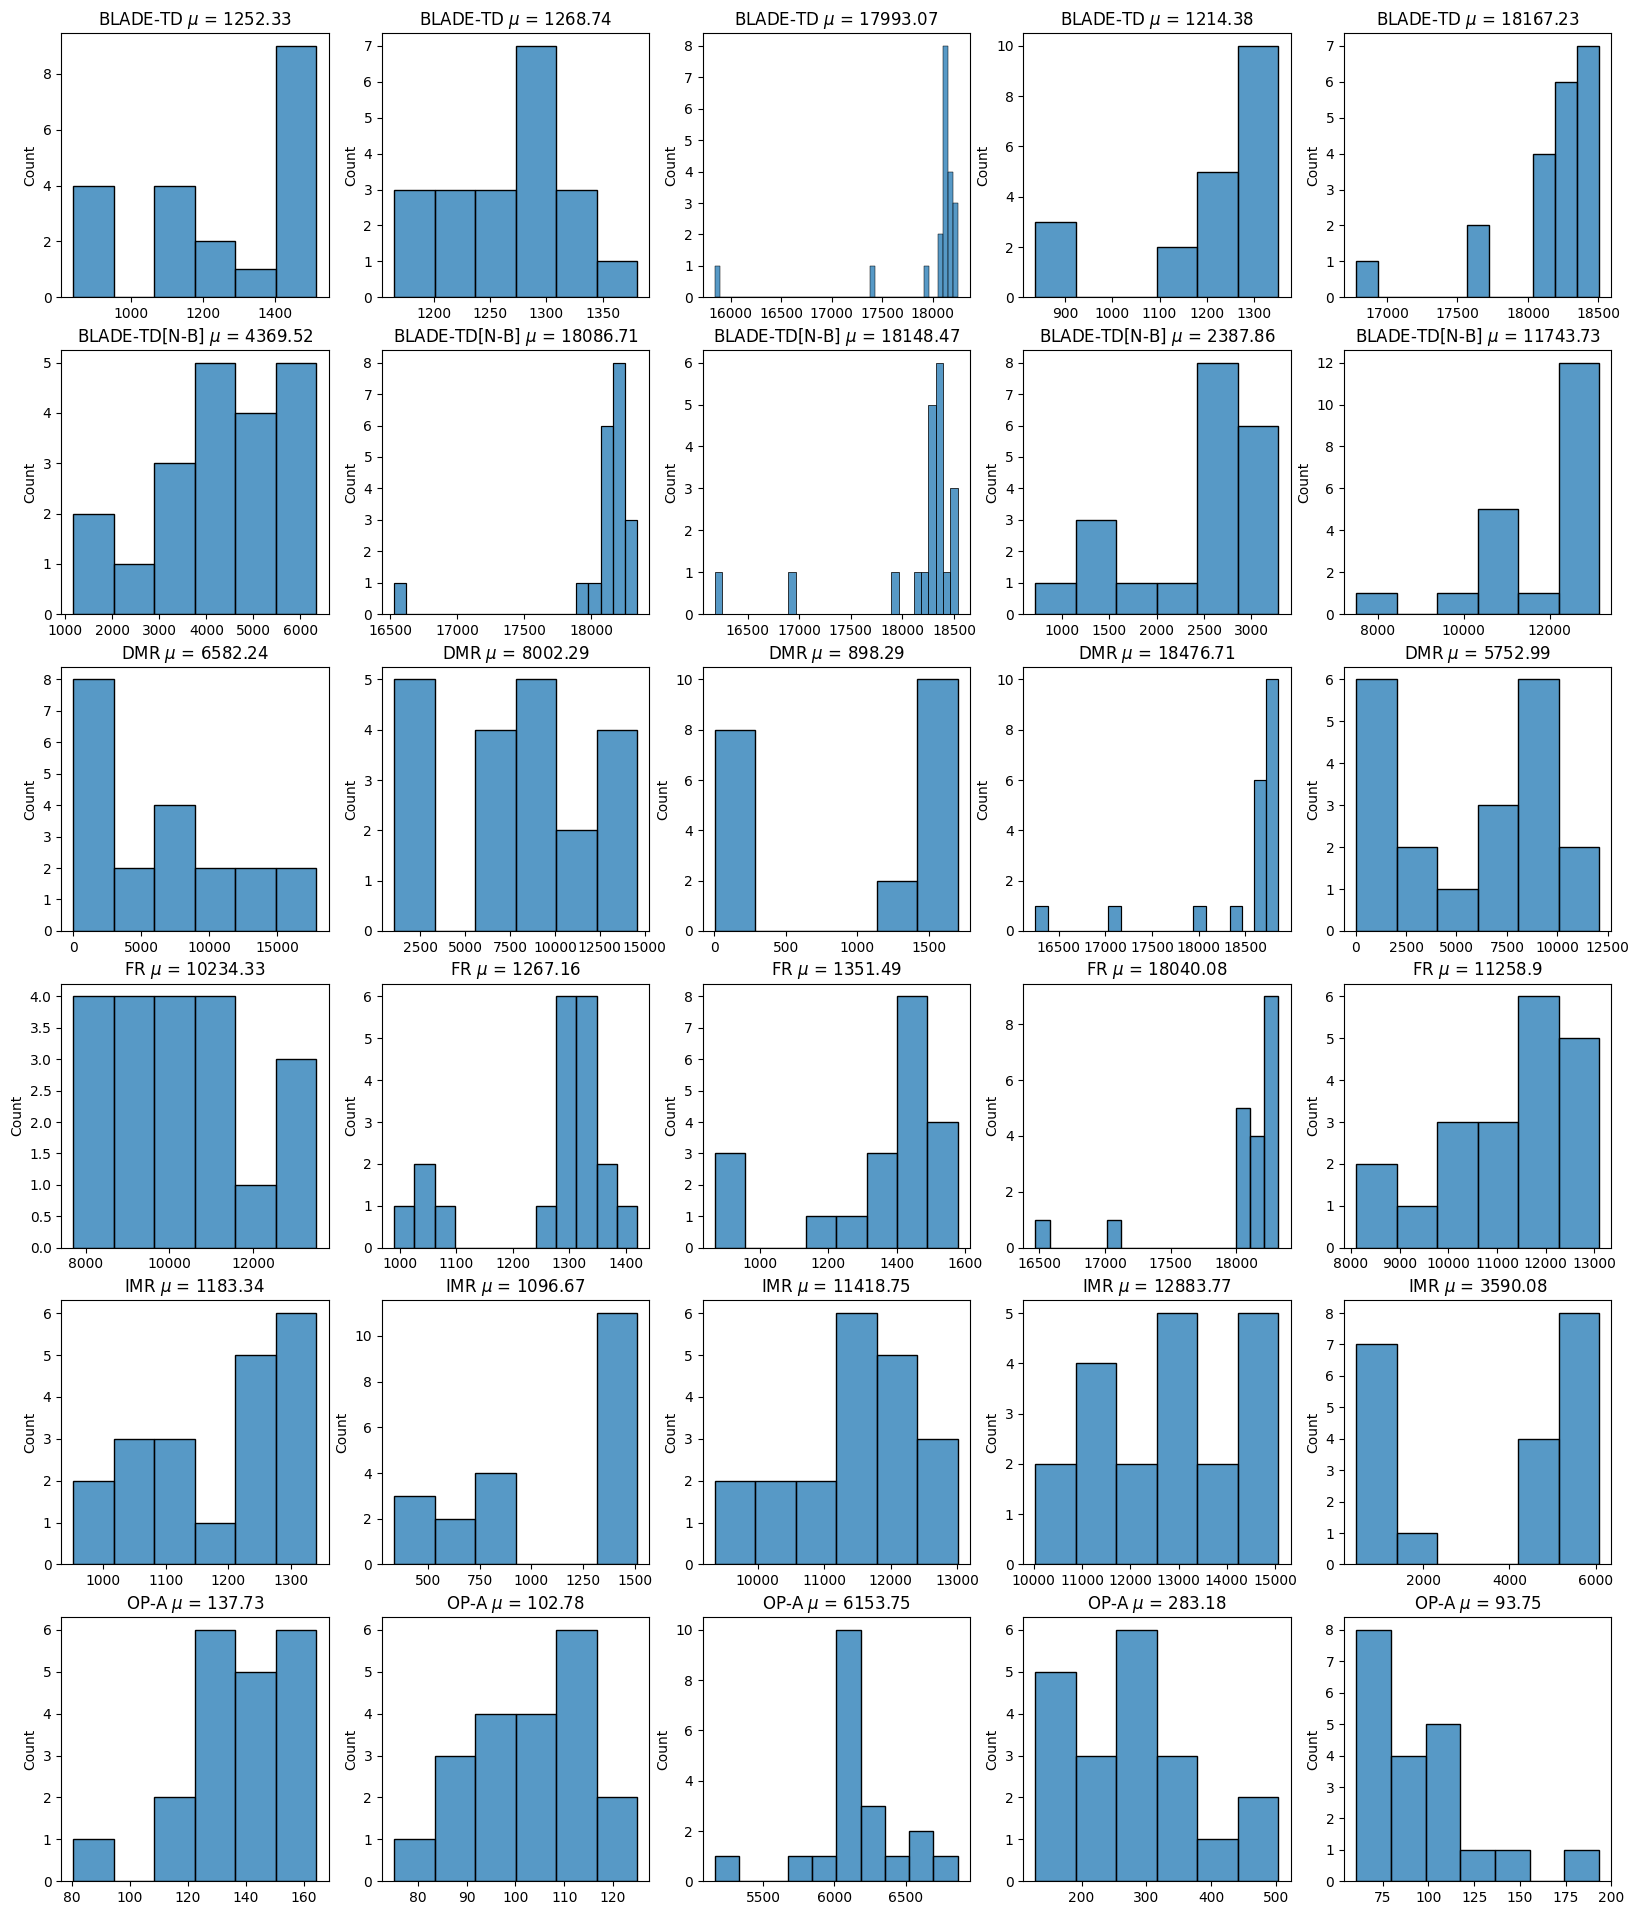

In [71]:
plot_sample_dist(df_metrics, 5)